In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# List the zip file
!ls "/content/drive/MyDrive/archive.zip"

# Unzip the contents into a folder
import zipfile

zip_path = "/content/drive/MyDrive/archive.zip"
extract_to = "/content/unzipped_folder"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# List the extracted files
import os
os.listdir(extract_to)


/content/drive/MyDrive/archive.zip


['HAM10000_images_part_2',
 'HAM10000_images_part_1',
 'hmnist_8_8_L.csv',
 'hmnist_28_28_RGB.csv',
 'ham10000_images_part_1',
 'hmnist_28_28_L.csv',
 'hmnist_8_8_RGB.csv',
 'ham10000_images_part_2',
 'HAM10000_metadata.csv']

In [ ]:
# Install necessary libraries in Google Colab
!pip install transformers
!pip install torch torchvision
!pip install PILLOW

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 34.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
# Import necessary libraries
from transformers import ViTForImageClassification, ViTImageProcessor
from PIL import Image
import torch
import requests
from io import BytesIO

In [ ]:
# Load the model and processor from Hugging Face
model_id = "actavkid/vit-large-patch32-384-finetuned-skin-lesion-classification"
processor = ViTImageProcessor.from_pretrained(model_id)
model = ViTForImageClassification.from_pretrained(model_id)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:  36%|###6      | 703M/1.93G [00:00<?, ?B/s]

In [ ]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
model = model.to(device)
model.eval()

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 1024, kernel_size=(32, 32), stride=(32, 32))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-23): 24 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=1024, out_features=4096, bias=True)
           

In [ ]:
#Collect First 150 Image Paths
from pathlib import Path

dataset_path = Path("/content/unzipped_folder/HAM10000_images_part_1")

image_paths = list(dataset_path.glob("*.jpg"))[:150]
print(f"Loaded {len(image_paths)} image paths.")

Loaded 150 image paths.


In [ ]:
#Classify All Images and Print Results
for image_path in image_paths:
    image = Image.open(image_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt").to(device)

    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)[0]
    predicted_class_idx = torch.argmax(probabilities).item()
    predicted_class = model.config.id2label[predicted_class_idx]
    score = probabilities[predicted_class_idx].item()

    print(f"{image_path.name}: Predicted class = {predicted_class}, Confidence = {score:.2%}")

ISIC_0025004.jpg: Predicted class = nevus, Confidence = 99.99%
ISIC_0025087.jpg: Predicted class = nevus, Confidence = 99.64%
ISIC_0024517.jpg: Predicted class = basal cell carcinoma, Confidence = 99.96%
ISIC_0024373.jpg: Predicted class = melanoma metastasis, Confidence = 98.53%
ISIC_0025544.jpg: Predicted class = nevus, Confidence = 99.80%
ISIC_0025655.jpg: Predicted class = nevus, Confidence = 99.99%
ISIC_0026215.jpg: Predicted class = nevus, Confidence = 56.11%
ISIC_0027838.jpg: Predicted class = nevus, Confidence = 99.87%
ISIC_0028891.jpg: Predicted class = nevus, Confidence = 99.90%
ISIC_0027377.jpg: Predicted class = nevus, Confidence = 99.97%
ISIC_0024317.jpg: Predicted class = nevus, Confidence = 99.98%
ISIC_0024884.jpg: Predicted class = nevus, Confidence = 99.91%
ISIC_0026217.jpg: Predicted class = nevus, Confidence = 100.00%
ISIC_0028666.jpg: Predicted class = nevus, Confidence = 71.59%
ISIC_0028224.jpg: Predicted class = solar lentigo, Confidence = 99.97%
ISIC_0024799.jpg:

In [ ]:
import pandas as pd

# Load metadata
metadata_path = "/content/unzipped_folder/HAM10000_metadata.csv"
df = pd.read_csv(metadata_path)

# Match image filenames
df["image_id"] = df["image_id"].apply(lambda x: f"{x}.jpg")
df = df[df["image_id"].isin([p.name for p in image_paths])]

# Encode 'mel' as 1, others as 0
df["target"] = (df["dx"] == "mel").astype(int)

# Map image paths
image_dict = {p.name: p for p in image_paths}
df["path"] = df["image_id"].map(image_dict)

# Final data
X = df["path"].tolist()
y = df["target"].tolist()


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
from PIL import Image

# Get score for an image
def get_mel_score(image_path):
    image = Image.open(image_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model(**inputs)
    probs = torch.nn.functional.softmax(outputs.logits, dim=1)
    return probs[0][model.config.label2id["melanoma"]].item()

# 10-fold CV
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

all_true = []
all_scores = []

fold_aucs = []  # For storing AUC per fold

# Loop over each fold
for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    print(f"\nFold {fold}")
    X_test = [X[i] for i in test_idx]
    y_test = [y[i] for i in test_idx]

    # Get predicted scores for the test images in this fold
    y_scores = [get_mel_score(path) for path in tqdm(X_test)]

    # Calculate AUC for the current fold
    fold_auc = roc_auc_score(y_test, y_scores)
    fold_aucs.append(fold_auc)
    print(f"AUC for Fold {fold}: {fold_auc:.4f}")

    # Store true labels and predicted scores for final ROC curve calculation
    all_true.extend(y_test)
    all_scores.extend(y_scores)


Fold 1


100%|██████████| 15/15 [00:31<00:00,  2.11s/it]


AUC for Fold 1: 0.5714

Fold 2


100%|██████████| 15/15 [00:30<00:00,  2.06s/it]


AUC for Fold 2: 0.4286

Fold 3


100%|██████████| 15/15 [00:40<00:00,  2.69s/it]


AUC for Fold 3: 1.0000

Fold 4


100%|██████████| 15/15 [00:31<00:00,  2.09s/it]


AUC for Fold 4: 1.0000

Fold 5


100%|██████████| 15/15 [00:30<00:00,  2.03s/it]


AUC for Fold 5: 0.5714

Fold 6


100%|██████████| 15/15 [00:31<00:00,  2.08s/it]


AUC for Fold 6: 0.9286

Fold 7


100%|██████████| 15/15 [00:30<00:00,  2.04s/it]


AUC for Fold 7: 1.0000

Fold 8


100%|██████████| 15/15 [00:30<00:00,  2.06s/it]


AUC for Fold 8: 1.0000

Fold 9


100%|██████████| 15/15 [00:31<00:00,  2.12s/it]


AUC for Fold 9: 0.7692

Fold 10


100%|██████████| 15/15 [00:30<00:00,  2.04s/it]

AUC for Fold 10: 0.6154


In [ ]:
from transformers import AutoProcessor, AutoModelForCausalLM
from PIL import Image
import re
import torch
from transformers import Blip2Processor, Blip2ForConditionalGeneration
from pathlib import Path
import pandas as pd
from tqdm import tqdm
from huggingface_hub import login

# Final AUC and ROC Curve
final_auc = roc_auc_score(all_true, all_scores)
fpr, tpr, _ = roc_curve(all_true, all_scores)
print(f"\nAverage AUC over 10 folds: {sum(fold_aucs)/len(fold_aucs):.4f}")


Average AUC over 10 folds: 0.7885


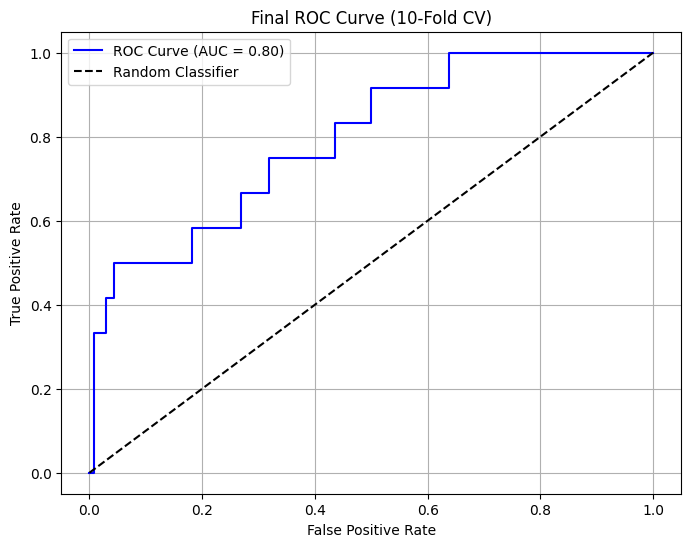

In [ ]:
# Plot final ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {final_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Final ROC Curve (10-Fold CV)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from PIL import ImageEnhance

def preprocessing_agent(image_path):
    image = Image.open(image_path).convert("RGB")

    # Resize to ViT expected input size (384x384)
    image = image.resize((384, 384))

    # Enhance contrast slightly
    enhancer = ImageEnhance.Contrast(image)
    image = enhancer.enhance(1.2)  # 1.0 = original, >1 = more contrast

    return image


In [ ]:
import numpy as np
import cv2
from PIL import Image

def border_detection_agent(image: Image.Image):

    # Simulates border detection by generating a mask and cropping the lesion area.

    grayscale = np.array(image.convert("L"))
    _, mask = cv2.threshold(grayscale, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        x, y, w, h = cv2.boundingRect(max(contours, key=cv2.contourArea))
        cropped = image.crop((x, y, x + w, y + h))
        return cropped.resize((384, 384))
    else:
        return image.resize((384, 384))


In [ ]:
def triage_agent(image_or_path, threshold=0.3):
    if isinstance(image_or_path, (str, Path)):
        image = Image.open(str(image_or_path)).convert("RGB")
    else:
        image = image_or_path

    inputs = processor(images=image, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model(**inputs)

    probs = torch.nn.functional.softmax(outputs.logits, dim=1)[0]
    mel_score = probs[model.config.label2id["melanoma"]].item()

    return mel_score >= threshold, mel_score


In [ ]:
def navigation_agent(preprocessed_image, crop_size=224):
    width, height = preprocessed_image.size
    left = (width - crop_size) // 2
    top = (height - crop_size) // 2
    right = left + crop_size
    bottom = top + crop_size

    cropped_image = preprocessed_image.crop((left, top, right, bottom))

    inputs = processor(images=cropped_image, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model(**inputs)

    probs = torch.nn.functional.softmax(outputs.logits, dim=1)[0]
    pred_idx = torch.argmax(probs).item()
    pred_class = model.config.id2label[pred_idx]
    confidence = probs[pred_idx].item()

    return pred_class, confidence


In [ ]:
def full_agent_pipeline(image_path, threshold=0.3):
    preprocessed_image = preprocessing_agent(image_path)
    is_suspicious, mel_score = triage_agent(preprocessed_image, threshold)

    if is_suspicious:
        pred_class, confidence = navigation_agent(preprocessed_image)
        print(f"{image_path.name}: [SUSPICIOUS] → {pred_class} ({confidence:.2%}) [Mel Score: {mel_score:.2%}]")
    else:
        print(f"{image_path.name}: [NOT suspicious] [Mel Score: {mel_score:.2%}]")
for img_path in image_paths[:150]:  # First 150 images
    full_agent_pipeline(img_path)


ISIC_0025004.jpg: [NOT suspicious] [Mel Score: 0.00%]
ISIC_0025087.jpg: [NOT suspicious] [Mel Score: 2.21%]
ISIC_0024517.jpg: [NOT suspicious] [Mel Score: 0.00%]
ISIC_0024373.jpg: [NOT suspicious] [Mel Score: 0.01%]
ISIC_0025544.jpg: [NOT suspicious] [Mel Score: 0.03%]
ISIC_0025655.jpg: [NOT suspicious] [Mel Score: 0.01%]
ISIC_0026215.jpg: [NOT suspicious] [Mel Score: 1.12%]
ISIC_0027838.jpg: [NOT suspicious] [Mel Score: 0.07%]
ISIC_0028891.jpg: [NOT suspicious] [Mel Score: 0.00%]
ISIC_0027377.jpg: [NOT suspicious] [Mel Score: 0.04%]
ISIC_0024317.jpg: [NOT suspicious] [Mel Score: 0.01%]
ISIC_0024884.jpg: [NOT suspicious] [Mel Score: 0.00%]
ISIC_0026217.jpg: [NOT suspicious] [Mel Score: 0.01%]
ISIC_0028666.jpg: [NOT suspicious] [Mel Score: 0.12%]
ISIC_0028224.jpg: [NOT suspicious] [Mel Score: 0.04%]
ISIC_0024799.jpg: [NOT suspicious] [Mel Score: 0.02%]
ISIC_0024538.jpg: [NOT suspicious] [Mel Score: 15.83%]
ISIC_0027307.jpg: [NOT suspicious] [Mel Score: 0.05%]
ISIC_0026769.jpg: [NOT susp

In [ ]:
from transformers import Blip2Processor, Blip2ForConditionalGeneration
from transformers import AutoProcessor, AutoModelForCausalLM, AutoModelForImageClassification
from PIL import Image
import torch
import os
import pandas as pd


In [ ]:
# Load ViT model
vit_model_name = "actavkid/vit-large-patch32-384-finetuned-skin-lesion-classification"
vit_processor = AutoProcessor.from_pretrained(vit_model_name)
vit_model = AutoModelForImageClassification.from_pretrained(vit_model_name)
vit_model.eval()
vit_model.to("cuda" if torch.cuda.is_available() else "cpu")

# Load BLIP2 model (lighter version)
blip_processor = Blip2Processor.from_pretrained("Salesforce/blip2-flan-t5-xl")
blip_model = Blip2ForConditionalGeneration.from_pretrained(
    "Salesforce/blip2-flan-t5-xl",
    device_map="auto",
    torch_dtype=torch.float16)

# Load GIT model (on CPU to avoid GPU OOM)
git_processor = AutoProcessor.from_pretrained("microsoft/git-large")
git_model = AutoModelForCausalLM.from_pretrained("microsoft/git-large").to("cpu")


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/21.0k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.22k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/128k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.96G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/5.81G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/503 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/453 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.82k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.58G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.58G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

In [ ]:
# Image folder and first 10 images
image_folder = "/content/unzipped_folder/HAM10000_images_part_1"
image_files = sorted(os.listdir(image_folder))[:150]


In [ ]:
# Define ViT scoring function
def get_vit_score(img_path, processor, model):
    image = Image.open(img_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt").to(model.device)
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probs = torch.nn.functional.softmax(logits, dim=-1)
    malignancy_score = probs[0][1].item()  # assuming index 1 = melanoma
    return malignancy_score

# BLIP2 captioning
def generate_blip_caption(img_path):
    image = Image.open(img_path).convert("RGB")
    prompt = "Describe this skin lesion image."
    inputs = blip_processor(images=image, text=prompt, return_tensors="pt").to(blip_model.device)
    output = blip_model.generate(**inputs, max_new_tokens=50)
    caption = blip_processor.batch_decode(output, skip_special_tokens=True)[0].strip()
    return caption

# GIT captioning
def generate_git_caption(img_path):
    image = Image.open(img_path).convert("RGB")
    inputs = git_processor(images=image, return_tensors="pt").to("cpu")
    output = git_model.generate(**inputs, max_new_tokens=50)
    caption = git_processor.tokenizer.decode(output[0], skip_special_tokens=True).strip()
    return caption


In [ ]:
# Process images
results = []

for img_name in image_files:
    img_path = os.path.join(image_folder, img_name)

    # Initialize with default values
    vit_score = ""
    blip_caption = ""
    git_caption = ""

    try:
        vit_score = get_vit_score(img_path, vit_processor, vit_model)
    except Exception as e:
        vit_score = f"ViT Error: {e}"

    try:
        blip_caption = generate_blip_caption(img_path)
    except Exception as e:
        blip_caption = f"BLIP2 Error: {e}"

    try:
        git_caption = generate_git_caption(img_path)
    except Exception as e:
        git_caption = f"GIT Error: {e}"

    results.append({
        "ImageID": img_name,
        "VIT_Malignancy_Score": vit_score,
        "BLIP2_Malignancy_Score": blip_caption,
        "GIT_Malignancy_Score": git_caption
    })


KeyboardInterrupt: 

In [ ]:
# Save results
df = pd.DataFrame(results)
df.to_csv("final.csv", index=False)
print("Saved to final.csv")


In [ ]:
import os
import pandas as pd
import torch
from PIL import Image
from tqdm import tqdm
import torch.nn.functional as F
from sklearn.metrics import classification_report, accuracy_score, f1_score
from transformers import (
    AutoProcessor,
    AutoModelForImageClassification,
    CLIPProcessor,
    CLIPModel,
    AutoProcessor as GitProcessor,
    AutoModelForCausalLM as GitModel
)


In [ ]:
# CONFIGURATION
image_dir = "/content/unzipped_folder/HAM10000_images_part_1"
metadata_csv = "/content/unzipped_folder/HAM10000_metadata.csv"
output_csv = "/content/final_malignancy_result_with_eval.csv"
device = "cuda" if torch.cuda.is_available() else "cpu"


In [ ]:
# Load ViT model
vit_model_name = "actavkid/vit-large-patch32-384-finetuned-skin-lesion-classification"
vit_processor = AutoProcessor.from_pretrained(vit_model_name)
vit_model = AutoModelForImageClassification.from_pretrained(vit_model_name).to(device)
vit_model.eval()

# Load CLIP model
clip_model_name = "openai/clip-vit-base-patch16"
clip_processor = CLIPProcessor.from_pretrained(clip_model_name)
clip_model = CLIPModel.from_pretrained(clip_model_name).to(device)
clip_model.eval()

# Load GIT model
git_model_name = "microsoft/git-base"
git_processor = GitProcessor.from_pretrained(git_model_name)
git_model = GitModel.from_pretrained(git_model_name).to(device)
git_model.eval()


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.10k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/599M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/599M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/503 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/453 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.82k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/707M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

GitForCausalLM(
  (git): GitModel(
    (embeddings): GitEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(1024, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (image_encoder): GitVisionModel(
      (vision_model): GitVisionTransformer(
        (embeddings): GitVisionEmbeddings(
          (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16), bias=False)
          (position_embedding): Embedding(197, 768)
        )
        (pre_layrnorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (encoder): GitVisionEncoder(
          (layers): ModuleList(
            (0-11): 12 x GitVisionEncoderLayer(
              (self_attn): GitVisionAttention(
                (k_proj): Linear(in_features=768, out_features=768, bias=True)
                (v_proj): Linear(in_features=768, out_features=768, bias=True)
             

In [ ]:
# Load metadata and map ground truth labels
metadata = pd.read_csv(metadata_csv)
diagnosis_map = {
    'nv': 'Benign',
    'bkl': 'Benign',
    'df': 'Benign',
    'vasc': 'Benign',
    'akiec': 'Malignant',
    'bcc': 'Malignant',
    'mel': 'Malignant'
}
metadata['GroundTruthLabel'] = metadata['dx'].map(diagnosis_map)
metadata['filename'] = metadata['image_id'] + '.jpg'


In [ ]:
# 150 images
all_images = sorted([f for f in os.listdir(image_dir) if f.endswith('.jpg')])
selected_images = all_images[:150]
image_paths = [os.path.join(image_dir, fname) for fname in selected_images]
metadata = metadata[metadata['filename'].isin(selected_images)].copy()


In [ ]:
malignant_labels = ['melanoma', 'basal cell carcinoma', 'actinic keratosis']

In [ ]:
# Define ViT scoring function
def run_vit(image):
    inputs = vit_processor(images=image, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = vit_model(**inputs)
        probs = F.softmax(outputs.logits, dim=1)[0]
    vit_score = sum([
        probs[i].item()
        for i, label in vit_model.config.id2label.items()
        if label in malignant_labels
    ])
    vit_malignant = "Yes" if vit_score >= 0.5 else "No"
    triage = "Escalate" if vit_score >= 0.5 else "STOP"
    return round(vit_score, 4), vit_malignant, triage

# CLIP captioning
def run_clip(image):
    try:
        inputs = clip_processor(
            text=["This is a malignant lesion", "This is a benign lesion"],
            images=image,
            return_tensors="pt",
            padding=True
        ).to(device)
        with torch.no_grad():
            outputs = clip_model(**inputs)
            probs = outputs.logits_per_image.softmax(dim=1)
        malignant_score = probs[0][0].item()
        prediction = "malignant" if probs[0][0] > probs[0][1] else "benign"
        return f"{malignant_score * 100:.2f}%. It looks {prediction}.", "Yes" if prediction == "malignant" else "No"
    except Exception as e:
        return f"Error: {str(e)}", "Unknown"

# GIT captioning
def run_git(image):
    try:
        inputs = git_processor(images=image, return_tensors="pt").to(device)
        with torch.no_grad():
            generated_ids = git_model.generate(pixel_values=inputs["pixel_values"], max_new_tokens=50)
        text = git_processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip().lower()
        is_malignant = "Yes" if any(word in text for word in ["malignant", "cancer", "tumor", "dangerous"]) else "No"
        return text, is_malignant
    except Exception as e:
        return f"Error: {str(e)}", "Unknown"

In [ ]:
# Process images
results = []

for path in tqdm(image_paths, desc="Processing 150 Images"):
    image = Image.open(path).convert("RGB")
    resized_image = image.resize((364, 364))
    image_id = os.path.basename(path)

    # Run models
    vit_score, vit_malignant, triage = run_vit(image)
    clip_answer, clip_malignant = run_clip(resized_image)
    git_answer, git_malignant = run_git(image)

    # Ground Truth
    gt_label = metadata.loc[metadata['filename'] == image_id, 'GroundTruthLabel'].values
    gt_label = gt_label[0] if len(gt_label) else "Unknown"

    results.append({
        "ImageID": image_id,
        "GroundTruthLabel": gt_label,
        "VIT_Malignancy_Score": vit_score,
        "VIT_Malignant": vit_malignant,
        "Triage": triage,
        "CLIP_Answer": clip_answer,
        "CLIP_Malignant": clip_malignant,
        "GIT_Answer": git_answer,
        "GIT_Malignant": git_malignant
    })

Processing 150 Images: 100%|██████████| 150/150 [54:54<00:00, 21.96s/it]


In [ ]:
# SAVE RESULTS
df = pd.DataFrame(results)
df.sort_values("ImageID", inplace=True)
df.to_csv(output_csv, index=False)
print(f"Final results saved to: {output_csv}")

Final results saved to: /content/final_malignancy_result_with_eval.csv


In [ ]:
import pandas as pd

# Load your existing result CSV from ViT, CLIP, GIT pipeline
df = pd.read_csv("/content/final_malignancy_result_with_eval.csv")

# Standardize labels
df["GroundTruthLabel"] = df["GroundTruthLabel"].str.lower()
df["CLIP_Malignant"] = df["CLIP_Malignant"].str.lower()
df["GIT_Malignant"] = df["GIT_Malignant"].str.lower()

triage_thresholds = [0.4, 0.5, 0.6]

def compute_metrics(y_true, y_pred):
    TP = sum((y_true == "malignant") & (y_pred == "malignant"))
    TN = sum((y_true == "benign") & (y_pred == "benign"))
    FP = sum((y_true == "benign") & (y_pred == "malignant"))
    FN = sum((y_true == "malignant") & (y_pred == "benign"))
    sen = TP / (TP + FN) if (TP + FN) > 0 else 0
    spe = TN / (TN + FP) if (TN + FP) > 0 else 0
    return TP, TN, FP, FN, round(sen, 3), round(spe, 3)

# Start building the final table
final_table = {
    "Decision System": ["S1", "S2"]
}

# Add metrics per threshold
for threshold in triage_thresholds:
    #  S1 VIT-only
    vit_pred = df["VIT_Malignancy_Score"].apply(lambda x: "malignant" if x >= 0.5 else "benign")
    y_true = df["GroundTruthLabel"]
    s1_metrics = compute_metrics(y_true, vit_pred)

    # S2 VIT triage + CLIP/GIT
    def s2_decision(row):
        if row["VIT_Malignancy_Score"] < threshold:
            return "benign"
        return "malignant" if row["CLIP_Malignant"] == "yes" or row["GIT_Malignant"] == "yes" else "benign"

    s2_pred = df.apply(s2_decision, axis=1)
    s2_metrics = compute_metrics(y_true, s2_pred)

    # Add each metric under a descriptive column
    metric_labels = ["TP", "TN", "FP", "FN", "Sen", "Sep"]
    for i, label in enumerate(metric_labels):
        final_table[f"{label}_T{threshold}"] = [s1_metrics[i], s2_metrics[i]]

# Convert to DataFrame
excel_table_df = pd.DataFrame(final_table)

# Add row above showing number of lesions
num_lesions = len(df)
excel_table_df.loc[-1] = ["Num of Lesion"] + [num_lesions] + [""] * (excel_table_df.shape[1] - 2)
excel_table_df.index = excel_table_df.index + 1
excel_table_df.sort_index(inplace=True)

# Save to CSV (or Excel if you want .xlsx)
excel_table_df.to_csv("/content/S1_S2_TP_TN_table.csv", index=False)

# Preview
print(excel_table_df)


  Decision System  TP_T0.4 TN_T0.4 FP_T0.4 FN_T0.4 Sen_T0.4 Sep_T0.4 TP_T0.5  \
0   Num of Lesion      150                                                     
1              S1       16     114       9      11    0.593    0.927      16   
2              S2        2     117       6      25    0.074    0.951       1   

  TN_T0.5 FP_T0.5 FN_T0.5 Sen_T0.5 Sep_T0.5 TP_T0.6 TN_T0.6 FP_T0.6 FN_T0.6  \
0                                                                             
1     114       9      11    0.593    0.927      16     114       9      11   
2     117       6      26    0.037    0.951       1     118       5      26   

  Sen_T0.6 Sep_T0.6  
0                    
1    0.593    0.927  
2    0.037    0.959  


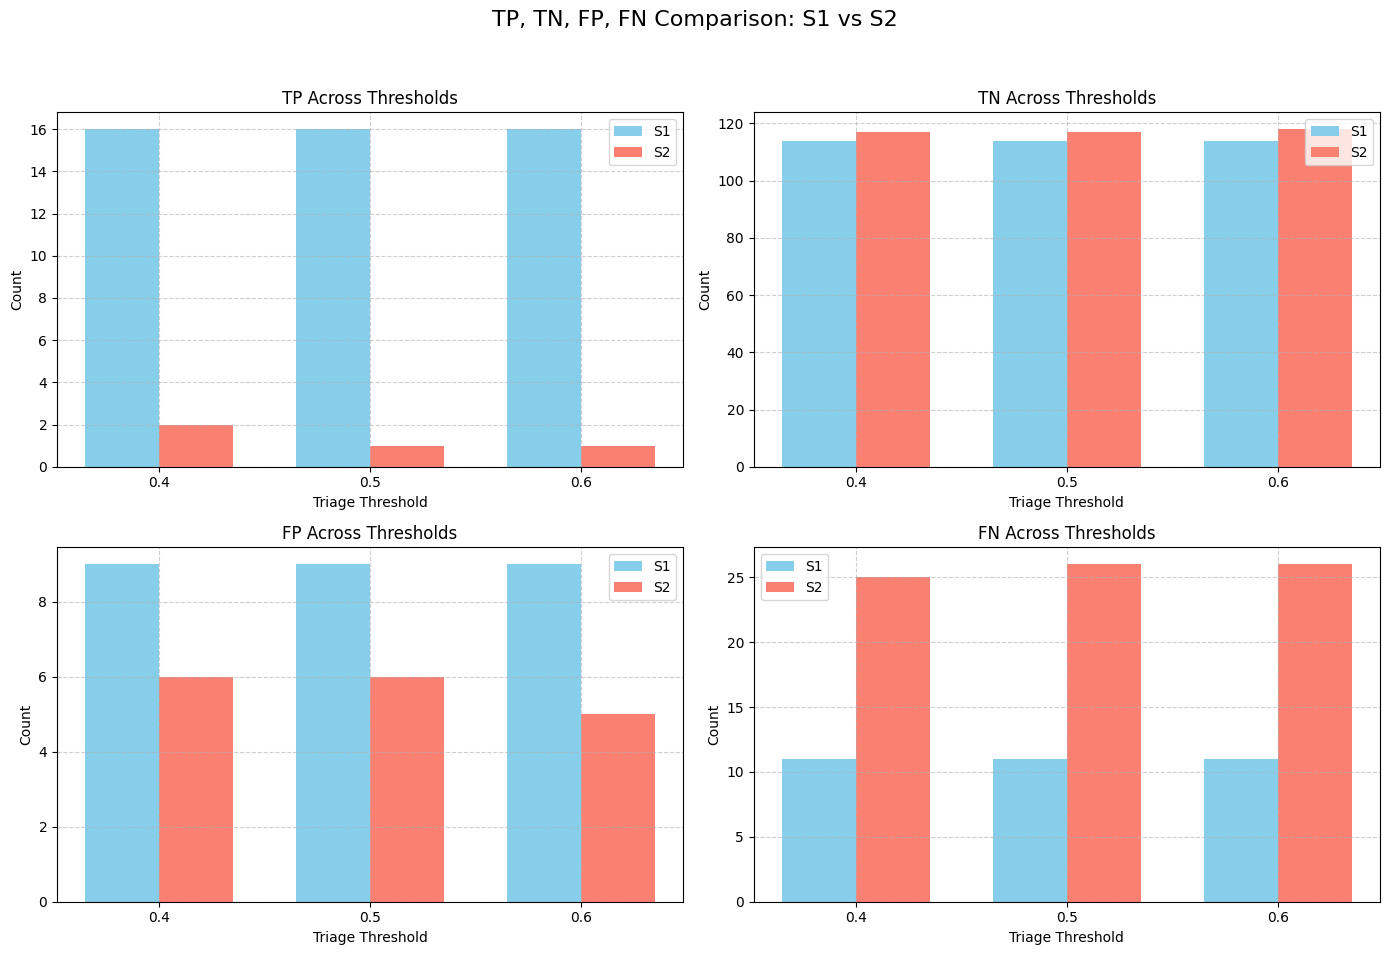

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the results
df = pd.read_csv("/content/S1_S2_TP_TN_table.csv")

# Remove the 'Num of Lesion' row
df = df[df["Decision System"] != "Num of Lesion"]

# Set parameters
thresholds = [0.4, 0.5, 0.6]
metrics = ["TP", "TN", "FP", "FN"]
systems = ["S1 (ViT-only)", "S2 (ViT+CLIP+GIT)"]
bar_width = 0.35
x = np.arange(len(thresholds))

# Set up subplots for each metric
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

# Plot each metric
for idx, metric in enumerate(metrics):
    ax = axs[idx]
    s1_vals = [df[f"{metric}_T{t}"].values[0] for t in thresholds]
    s2_vals = [df[f"{metric}_T{t}"].values[1] for t in thresholds]

    ax.bar(x - bar_width/2, s1_vals, bar_width, label="S1", color='skyblue')
    ax.bar(x + bar_width/2, s2_vals, bar_width, label="S2", color='salmon')

    ax.set_title(f"{metric} Across Thresholds")
    ax.set_xlabel("Triage Threshold")
    ax.set_xticks(x)
    ax.set_xticklabels(thresholds)
    ax.set_ylabel("Count")
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.6)

plt.suptitle("TP, TN, FP, FN Comparison: S1 vs S2", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


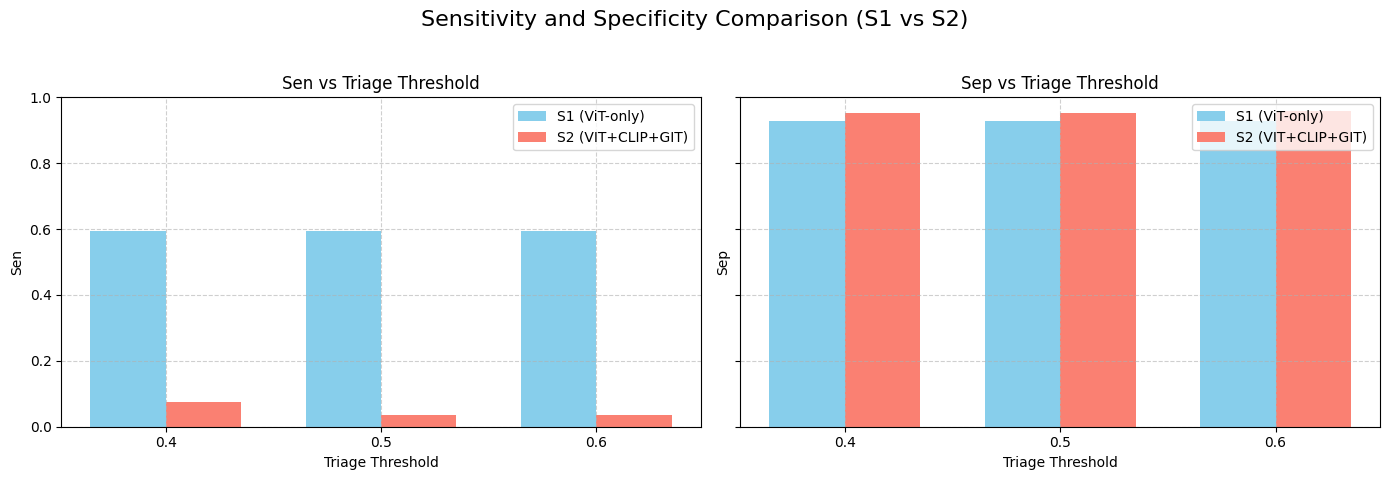

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV you created earlier
df = pd.read_csv("/content/S1_S2_TP_TN_table.csv")

# Drop the first row (which has "Num of Lesion")
df = df[df["Decision System"] != "Num of Lesion"]

# Extract systems
systems = df["Decision System"].values

# Thresholds
thresholds = [0.4, 0.5, 0.6]

# Prepare values for plotting
metrics = ["Sen", "Sep"]
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

for idx, metric in enumerate(metrics):
    ax = axes[idx]
    width = 0.35
    x = np.arange(len(thresholds))

    s1_values = [df[f"{metric}_T{t}"].values[0] for t in thresholds]
    s2_values = [df[f"{metric}_T{t}"].values[1] for t in thresholds]

    ax.bar(x - width/2, s1_values, width, label="S1 (ViT-only)", color='skyblue')
    ax.bar(x + width/2, s2_values, width, label="S2 (VIT+CLIP+GIT)", color='salmon')

    ax.set_title(f"{metric} vs Triage Threshold")
    ax.set_xlabel("Triage Threshold")
    ax.set_xticks(x)
    ax.set_xticklabels(thresholds)
    ax.set_ylabel(metric)
    ax.set_ylim(0, 1)
    ax.legend()
    ax.grid(True, linestyle="--", alpha=0.6)

plt.suptitle("Sensitivity and Specificity Comparison (S1 vs S2)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
